# Laporan Proyek Machine Learning - I Kadek Adi Memes Subagia


# Domain Proyek
 <h1>Analisa Pergerakan Harga Bitcoin</h1>

 <p>Bitcoin atau yang biasa kita kenal dengan BTC adalah salah satu mata uang digital atau yang kita kenal dengan cryptocurrency, hal ini menjadi sangat trend dan banyak sekali orang -orang yang mulai menaruh sebagian penghasilannya kedalam cryptocurrency. terutama pada Bitcoin ini karena Bitcoin menduduki Top 1 cryptocurrency dengan harga market tertinggi. bisa dilihat pada website <a href ="https://coinmarketcap.com/id/">Coinmarketcap</a></p> <br>
Permasalahan ini menjadi topik yang sedang hangat diperbincangkan di Indonesia. Banyak konten kreator yang mengedukasi masyarakat mengenai investasi dalam mata uang kripto, khususnya Bitcoin. Namun, penting untuk tidak langsung mengikuti ajakan investasi tanpa memahami terlebih dahulu apa itu Bitcoin serta faktor-faktor yang mempengaruhi fluktuasi nilainya.<br>

Karena Bitcoin merupakan mata uang digital dengan harga yang tidak dapat diprediksi hanya berdasarkan insting, pemahaman yang mendalam mengenai cryptocurrency menjadi hal yang penting. Dalam hal ini, Bitcoin dipilih sebagai contoh untuk dianalisis lebih lanjut.

# Business Understanding

Dari Latar belakang di atas mengenai kenapa saya mengambil contoh ini pada proyek saya, saya mendapati dua problem yaitu:

## Problem
*   Apa Saja Faktor yang mempengaruhi Kenaikan dan penurunan Harga Bitcoin ?
*   Bagaimana model machine learning dapat digunakan untuk memprediksi pergerakan harga Bitcoin dalam jangka waktu tertentu?

## Goals

*  Menganalisis faktor-faktor yang memiliki korelasi erat dengan harga Bitcoin.
*   Membangun model prediksi harga Bitcoin berdasarkan data historis untuk memperkirakan tren harga di masa depan.

## Solution statements

*   Untuk Permasalahan pertama, akan menggunakan visualisasi data berupa heatmap yang menunjukan korelasi antar fitur bitcoin, sehingga dapat didentifikasi faktor - faktor yang mempengaruhi kenaikan dan penurunan harga bitcoin.
*   Permasalahan kedua, akan dikembangkan menggunakan model prediksi menggunakan algoritma random forest dan dievaluasi dengan Mean Absolute Error (MEA), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), dan R-squared (R²)








## Mempersiapkan Envirotment

pada proyek ini saya menggunakan beberapa libary python yaitu:

*   Pandas
*   numpy
*   matplotlib
*   Seaborn

Dan pada proyek ini saya menggunakan algoritma supervised learning yaitu Random Forest





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Data Understanding

Untuk menyelesaikan permasalahan yang telah disampaikan sebelumnya, dataset yang digunakan diperoleh secara gratis dari Kaggle. Dataset dapat diakses melalui tautan berikut: <br>
[Dataset](https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory/data) <br>

Dataset ini berisi data historis dari 23 jenis cryptocurrency. Namun, karena fokus proyek ini adalah Bitcoin (BTC), hanya data terkait BTC yang digunakan untuk analisis.

## Mengambil Dataset Yang Sudah Di Download

In [2]:
url = "/content/drive/MyDrive/coin_Bitcoin.csv"
BTC = pd.read_csv(url)

BTC

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


Dataset ini terdiri dari 2.991 baris dan 10 kolom, dengan rincian sebagai berikut:

* SNo: Nomor urut data.

* Name: Nama cryptocurrency, dalam hal ini Bitcoin.

* Symbol: Simbol mata uang Bitcoin, yaitu BTC.

* Date: Tanggal pengambilan data, mencakup rentang waktu dari 2013 hingga 2021.

* High: Harga tertinggi Bitcoin pada tanggal tertentu.

* Low: Harga terendah Bitcoin pada tanggal tertentu.

* Open: Harga pembukaan Bitcoin pada tanggal tersebut.

* Close: Harga penutupan Bitcoin pada tanggal tersebut.

* Volume : Jumlah total Bitcoin yang diperdagangkan dalam satu hari

* Marketcap: Total nilai pasar Bitcoin dalam ekosistem cryptocurrency.



## EDA (Eksplorasi Data Analysis)

Pada tahap ini, eksplorasi data dilakukan untuk memahami karakteristik historis Bitcoin. Beberapa langkah yang akan dilakukan meliputi:

*   **Pemeriksaan Missing Values** Untuk memeastikan tidak ada data yang hilang pada data.
*   **Pemeriksaan tipe data** guna memastikan setiap kolom memiliki tipe data yang sesuia
*   **Pemeriksaan duplikasi data** untuk memastikan bahwa tidak ada data yang terduplikat
* **Visualisasi Data** untuk mempelajari data dengan mudah



### Pemeriksaan Missing Value

Pada Tahapan pengecekan missing value pada setiap kolom yang ada di dalam dataset kita bisa menggunakan kode .isnull().sum() untuk menghitung jumlah data yang mengalami missing value pada setiap kolom data

In [3]:
BTC.isnull().sum()

,0
SNo,0
Name,0
Symbol,0
Date,0
High,0
Low,0
Open,0
Close,0
Volume,0
Marketcap,0


Dilihat dari Hasil Kode di atas tidak ada data yang mengalami missing value pada setiap kolom data

### Pemeriksaan Tipe data

Untuk melihat informasi mengenai Dataset kita bisa menggunakan kode .info() agar bisa melihat nama colum, jumlah colom dan tipe data pada colom

In [4]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


Pada informasi Data, terlihat apada colum Date tipe data yang ada masih kurang tepat jadi lebih baik mengganti tipe data menjadi tipe data yang lebih tepat

#### Merubah tipe data Date dari Object menjadi datetime

pada kondisi ini kita bisa menggunakan libary pandas untuk merubahnya dengan code pd.to_datetime(data['kolom_tujuan')]
kemudian

In [5]:
BTC['Date'] = pd.to_datetime(BTC['Date'])
BTC.sort_values(by='Date', inplace=True)

In [6]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SNo        2991 non-null   int64         
 1   Name       2991 non-null   object        
 2   Symbol     2991 non-null   object        
 3   Date       2991 non-null   datetime64[ns]
 4   High       2991 non-null   float64       
 5   Low        2991 non-null   float64       
 6   Open       2991 non-null   float64       
 7   Close      2991 non-null   float64       
 8   Volume     2991 non-null   float64       
 9   Marketcap  2991 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 233.8+ KB


Tipe data pada colum date sudah diganti menjadi tipe data yang lebih tepat


## Visualisasi Data

### Pergerakan Harga Crypto

Pada bagian ini, dilakukan visualisasi pergerakan harga Bitcoin dari awal hingga akhir periode data. Visualisasi ini memanfaatkan beberapa kolom utama, yaitu:

*   Open (Harga pembukaan)
*   Close (Harga penutupan)
*   High (Harga tertinggi)
*   Low (Harga terendah)
*   Date (Tanggal transaksi)

Setiap variabel harga diberikan warna yang berbeda untuk memperjelas perbedaan antar nilai. Selain itu, sumbu X merepresentasikan tanggal (Date), sedangkan sumbu Y diberi label "Price (USD)" untuk menunjukkan nilai harga dalam dolar AS.



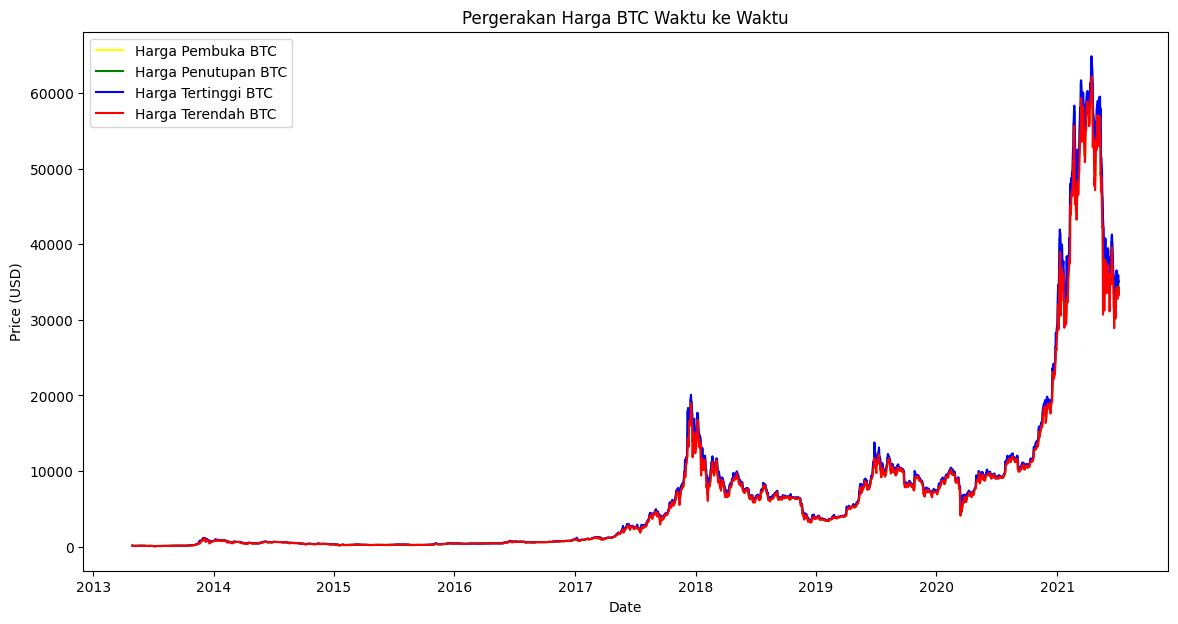

In [7]:
plt.figure(figsize=(14, 7))

plt.plot(BTC['Date'], BTC['Open'], label='Harga Pembuka BTC', color='yellow')
plt.plot(BTC['Date'], BTC['Close'], label='Harga Penutupan BTC', color='Green')
plt.plot(BTC['Date'], BTC['High'], label='Harga Tertinggi BTC', color='blue')
plt.plot(BTC['Date'], BTC['Low'], label='Harga Terendah BTC', color='red')
plt.title('Pergerakan Harga BTC Waktu ke Waktu')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

Tahun 2017 dan 2021 merupakan periode penting di mana harga Bitcoin mencapai rekor tertinggi. dari grafik ini terlihat bahwa Bitcoin bisa menjadi investasi dengan potensi keuntungan besar

### Bagaimana Rata - Rata Harga Penutupan Pada jangka Tahunan, Bulanan dan Minggu

Visualisasi ini dibuat untuk menganalisis seberapa drastis kenaikan dan penurunan harga Bitcoin dalam rentang waktu tahunan, bulanan, dan mingguan.

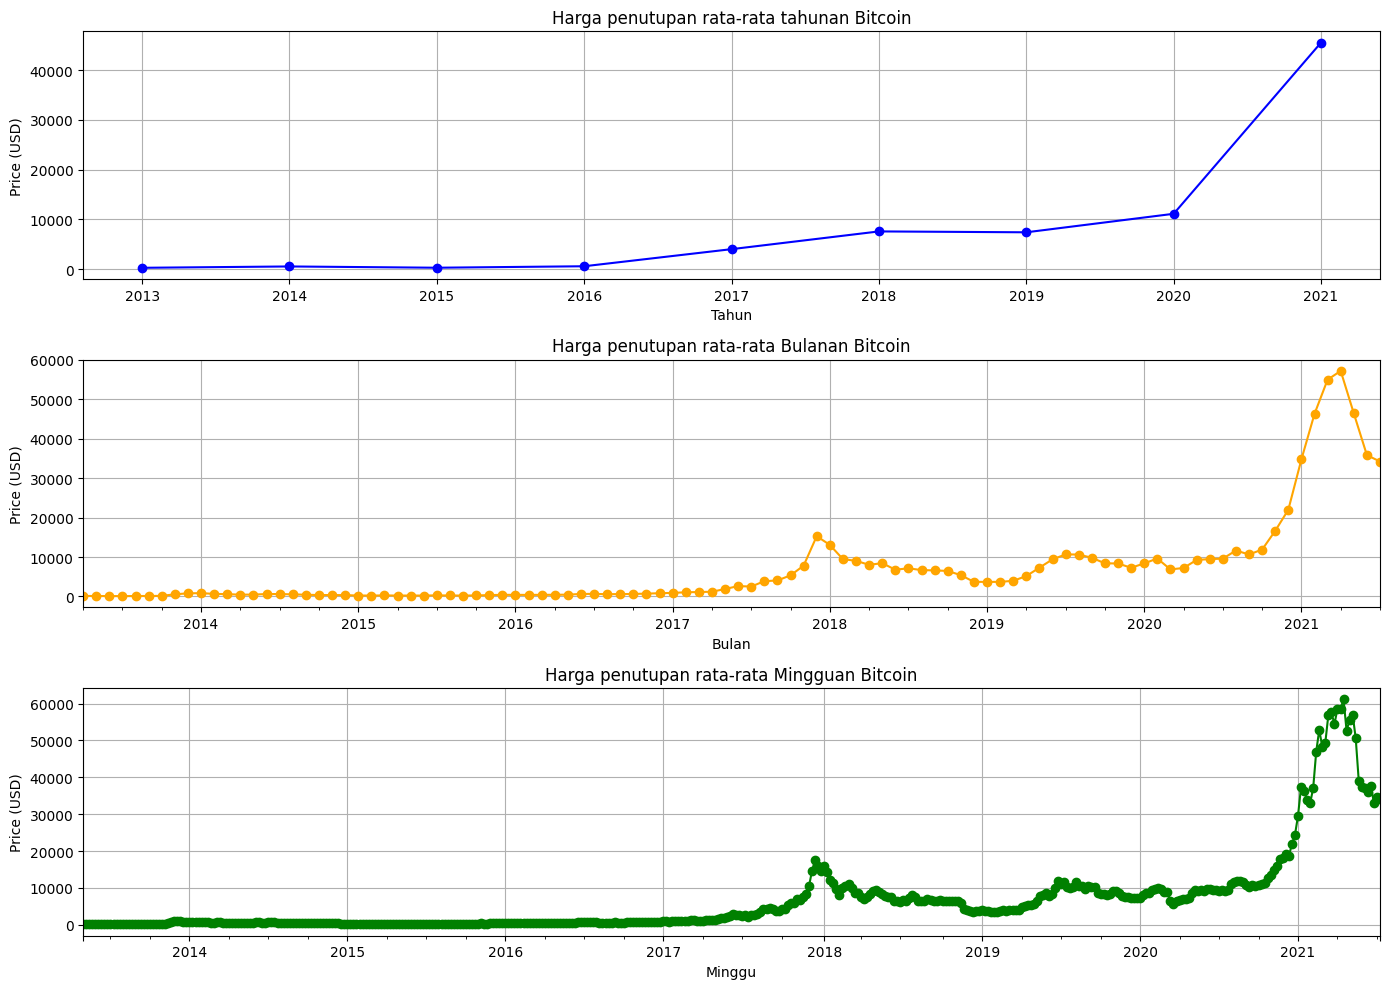

In [8]:
# convert kolom data menjadi datetime.
BTC['Date'] = pd.to_datetime(BTC['Date'])

# Menghitung rata-rata harga penutup per tahun Calculate
BTC['Year'] = BTC['Date'].dt.year
yearly_trend = BTC.groupby('Year')['Close'].mean()

# Menghitung rata-rata harga penutup per Bulan Calculate
BTC['Month'] = BTC['Date'].dt.to_period('M')
monthly_trend = BTC.groupby('Month')['Close'].mean()

# Menghitung rata-rata harga penutup per Minggu Calculate
BTC['Week'] = BTC['Date'].dt.to_period('W')
weekly_trend = BTC.groupby('Week')['Close'].mean()


plt.figure(figsize=(14, 10))

# Visualisasi Tahun
plt.subplot(3, 1, 1)
yearly_trend.plot(marker='o', color='blue')
plt.title('Harga penutupan rata-rata tahunan Bitcoin')
plt.xlabel('Tahun')
plt.ylabel('Price (USD)')
plt.grid(True)

# Visualisasi Bulan
plt.subplot(3, 1, 2)
monthly_trend.plot(marker='o', color='orange')
plt.title('Harga penutupan rata-rata Bulanan Bitcoin')
plt.xlabel('Bulan')
plt.ylabel('Price (USD)')
plt.grid(True)

# Visualisasi Minggu
plt.subplot(3, 1, 3)
weekly_trend.plot(marker='o', color='green')
plt.title('Harga penutupan rata-rata Mingguan Bitcoin')
plt.xlabel('Minggu')
plt.ylabel('Price (USD)')
plt.grid(True)

plt.tight_layout()
plt.show()

Dilihat Dari 3 Grafik Di atas Bisa:


*   Grafik Tahunan: Kenaikan nilai Bitcoin mulai terlihat signifikan sejak tahun 2016 hingga 2021, dengan tren kenaikan yang terus berlanjut.

*   Grafik Bulanan: Terlihat lonjakan harga yang cukup tinggi pada periode 2020 hingga 2021, diikuti oleh koreksi pasar untuk menstabilkan harga.

*   Grafik Mingguan: Memperlihatkan volatilitas harga Bitcoin yang tinggi di pasar. Bitcoin sempat mengalami kenaikan signifikan pada tahun 2017-2018, mengalami koreksi, lalu kembali meningkat pada tahun 2020-2021.

Puncak harga Bitcoin atau All-Time High (ATH) tercapai pada Maret 2021. Jika dilihat dari pola grafiknya, Bitcoin memiliki potensi sebagai instrumen investasi, tetapi tetap perlu mempertimbangkan volatilitasnya yang tinggi.

## Melihat Korelasi Dari BTC

Untuk menjawab pertanyaan pertama pada latar belakang:

"Apa saja faktor yang mempengaruhi kenaikan dan penurunan harga Bitcoin?"

Digunakan teknik visualisasi heatmap untuk menganalisis korelasi antara setiap fitur dalam dataset Bitcoin. Analisis ini berfokus pada kolom Close, yang merepresentasikan harga penutupan Bitcoin, guna mengidentifikasi faktor-faktor yang memiliki hubungan signifikan terhadap pergerakan harga.

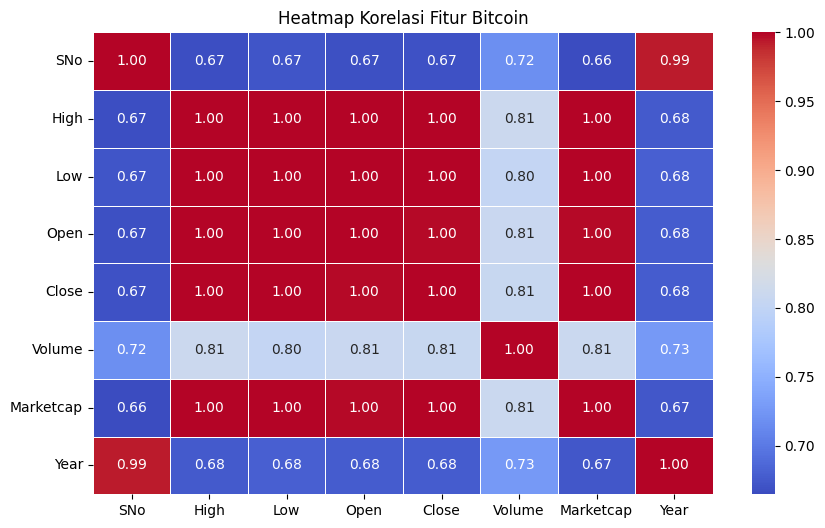

In [9]:
numerical_features = BTC.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sbn.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Bitcoin')
plt.show()

## Fitur Yang mempengaruhi Harga Bitcoin

Dilihat dari Heatmap di atas, kita bisa melihat bahwa yang memiliki korelasi kuat dengan harga Bitcoin yaitu:


*   Open
*   Low
*   High
*   Marketcap

Jadi untuk menmbuat prediksi dari harga BTC kita bisa menggunakan fitur tersebut menjadi acuannya. dengan targetnya dalah close yaang merupakan harga penutupan dari Bitcoin<br>

jadi bisa disimpulkan untuk jawaban dari permasalahan pertama sudah bisa dijawab.


# Data Preparation


### Feature Engginering

Pada tahap ini, dilakukan pemilihan fitur yang akan digunakan dalam model dengan menyaring kolom-kolom yang relevan dari dataset Bitcoin, yaitu:

**feature**: Kolom-kolom yang memiliki korelasi dengan harga Bitcoin.
 <br>

**Target** : Kolom harga penutupan Bitcoin yang dijadikan acuan dalam prediksi.

In [10]:
BTC = BTC[['Open', 'High', 'Low', 'Volume', 'Marketcap', 'Close']]

# Pilih fitur dan target
feature = BTC[['Open', 'High', 'Low', 'Volume', 'Marketcap']]
target = BTC['Close']

### Spilt Dataset

Pada tahap ini, dilakukan pembagian data menjadi dua bagian yaitu pagian train data dan test data, split data ini dilakukan dengan data pada feature engginering di atas yaitu **feature** dan **target**, <br>

pada tahap ini data dibagi menjadi 80% data train dan 20% data test dengan kode test_size = 0.2 yang mengartikan data test mengambil 20% saja

In [11]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2)

# Modeling dan Evaluasi

Untuk menjawab pertanyaan nomor dua, saya menggunakan **algoritma Random Forest.**


## Random Forest
Random Forest dipilih karena algoritma ini cocok untuk menangani data yang cukup kompleks.

### Cara Kerja Random Forest
Algoritma ini adalah algoritma ensemble learning berbasis decision tree,  Algoritma ini bekerja dengan cara membangun banyak pohon keputusan (decision trees) dan menggabungkan hasilnya untuk meningkatkan akurasi serta mengurangi risiko overfitting.<br>
karena Random Forest menerapkan metode bagging (agregasi bootstrap) untuk menghasilkan prediksi yang akurat dan stabil. yang dimana dalam algoritma ini mengambil sampel acak dari dataset maka dari itu disebut dengan Random Forest.

### Kelebihan
Kelebihan Dari Algoritma ini adalah cocok untuk dataset yang cukup kompleks karena mampu mengurangi overfiting dengan mengatur Hyperparameter yang ada dalam algoritma ini.

### Kekurangan
Kekurangan Dari Algoritma ini adalah kurang akurat untuk memprediksi jangka panjang dan ada alternatifnya yaitu menggunakan LSTM (Long Short-Term Memory)

# Algoritma Random Forest

Pada tahap ini melakukan sebuah Modeling menggunakan algoritma Random Forest yang dimana algoritma ini adalah metode ensemble learning yang menggabungkan banyak Decision Tree untuk menghasilkan prediksi yang lebih stabil dan akurat.

pada Algoritma ini ada bebearpa parameter yang digunakan yaitu:

*   n_estimators dengan value default yaitu 100<br>
parameter ini merupakan berapa banyak pohon yang akan digunakan, semakin banyak pohon semakin meningkatkan akurasi namun lama saat eksekusi
*   random_state dengan value none yaitu value bisa diisi berapa saja <br>
untuk mengatur Memilih subset fitur acak di setiap percabangan pohon agar hasil konsisten



In [12]:
# Inisialisasi model Random Forest
rf = RandomForestRegressor(n_estimators=150, random_state=42)

# Latih model
rf.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = rf.predict(X_test)

# Evaluasi model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print hasil evaluasi
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")

Mean Absolute Error (MAE): 53.16653051038279
Mean Squared Error (MSE): 14860.572896414964
Root Mean Squared Error (RMSE): 121.90394947012571
R-squared (R²) Score: 0.9998845303025761


# Testing Model

Disini saya mencoba menggunakan Testing model untuk prediksi harga Bitcoin Satu Tahun kedepan

In [13]:
# Simpan prediksi selama 365 hari
future_prices = []
latest_data = feature.iloc[-1:].copy()  # Ambil data terbaru

# Prediksi selama 365 hari ke depan
for i in range(365):
    latest_data['Volume'] *= 1.01  # Naik 1% per hari
    latest_data['Marketcap'] *= 1.005  # Naik 0.5% per hari

    # Prediksi harga BTC
    predicted_price = rf.predict(latest_data[['Open', 'High', 'Low', 'Volume', 'Marketcap']])[0]
    future_prices.append(predicted_price)

    # Update latest_data dengan harga prediksi terbaru
    latest_data['Open'] = predicted_price
    latest_data['High'] = predicted_price * 1.01
    latest_data['Low'] = predicted_price * 0.99

# Simpan hasil prediksi ke dalam DataFrame
future_df = pd.DataFrame({'Hari': np.arange(1, 366), 'Prediksi Harga BTC': future_prices})

# Menampilkan prediksi untuk 1 tahun mendatang
print(future_df)

     Hari  Prediksi Harga BTC
0       1        34407.850861
1       2        34599.254142
2       3        34649.314347
3       4        34859.446221
4       5        35169.693549
..    ...                 ...
360   361        63198.191273
361   362        63198.191273
362   363        63198.191273
363   364        63198.191273
364   365        63198.191273

[365 rows x 2 columns]


# Evaluation

Pada Proyek ini menggunakan empat Metrik evaluasi yaitu:

*   Mean Absolute Error (MAE)
*   Mean Squared Error (MSE)
*   Root Mean Squared Error (RMSE)
*   R-squared (R²) Score

Metrik ini digunakan karena metrik ini cocok untuk menjadi evaluasi dalam proyek regresion.

Dalam pelatihan model, didapatkan hasil seperti dibawah ini:

* Mean Absolute Error (MAE): 53.16653051038279
* Mean Squared Error (MSE): 14860.572896414964
* Root Mean Squared Error (RMSE): 121.90394947012571
* R-squared (R²) Score: 0.9998845303025761

Untuk metrik
* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)

jika nilai mendekati Nol berarti hasil dari model baik. <br>
sedangkan untuk nilai R-squared (R²) jika nilai mendekati satu berarti model berjalan dengan baik






## Kesimpulan

### Apakah Sudah Menjawab Problem Statment :

*   Apa Saja Faktor yang mempengaruhi Kenaikan dan penurunan Harga Bitcoin ?<br>
Untuk Pertanyaan ini sudah dijawab pada tahap EDA (Explorasi Data Analisi), dimana membuat visualisasi grafik Market Bitcoin dan visualisasi Heatmap untuk melihat fitur yang memiliki korelasi dengan Harga Bitcoin.
*   Bagaimana model machine learning dapat digunakan untuk memprediksi <br>
Untuk Pertanyaan ini sudah dijawab pada tahap Modeling data dan mendapatkan score evaluasi yang sudah termasuk Ok, Namun masih belum bisa menjadi acuan yang tepat karena masih banyak faktor eksternal yang mempengaruhi Harga Bitcoin.

### Apakah berhasil mencapai setiap goals yang diharapkan? :

*  Menganalisis faktor-faktor yang memiliki korelasi erat dengan harga Bitcoin. <br>
Goals ini sudah tercapai dengan mengetahui fitur yang memiliki korelasi dengan harga bitcoin yaitu : kolom Open, Low, High, dan Marketcap
*   Membangun model prediksi harga Bitcoin berdasarkan data historis untuk memperkirakan tren harga di masa depan. <br>
Goals ini juga sudah di uji pada tahap testing model dengan mencoba untuk memprediksi harga Bitcoin pada satu tahun kedepan, namun prediksi ini masih belum bisa di percaya 100% karena masih banyak faktor external yang mempengaruhi harga Bitcoin.

### Apakah setiap solusi statement yang kamu rencanakan berdampak? :
*   Untuk Permasalahan pertama, akan menggunakan visualisasi data berupa heatmap yang menunjukan korelasi antar fitur bitcoin, sehingga dapat didentifikasi faktor - faktor yang mempengaruhi kenaikan dan penurunan harga bitcoin. <br>
Tahap ini sudah berdampak karena berhasil menemukan korelasi yang berhubungan dengan Harga Bitcoin menggunakan Visualisasi Heatmap.
*   Permasalahan kedua, akan dikembangkan menggunakan model prediksi menggunakan algoritma random forest dan dievaluasi dengan Mean Absolute Error (MEA), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), dan R-squared (R²) <br>
Tahapan ini juga karena berhasil untuk memperlihatkan hasil score dari model yang sudah di latih yaitu score dari Mean Absolute Error (MEA), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), dan R-squared (R²)


